In [1]:
from warnings import filterwarnings as f
f("ignore")

In [39]:
# import libraries 
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import time

In [3]:
# define global stopwords
list_stopwords = set(stopwords.words('indonesian'))

In [4]:
# load dataset
data = pd.read_csv("ds.csv")

# overview dataset
data.head()

,id,created_at,text,label
0,1537498780144010000,17/06/22 01.14,@sahabatgiselle Pesen shopeefood yang makanan ...,positif
1,1537498557913400000,17/06/22 01.13,@holyzaa @FOODFESS2 pake shopeefood aja 24k bi...,positif
2,1537495458813480000,17/06/22 01.00,Indo\n\nPesawat siapin budget : 1 - 1.5jt pp\n...,netral
3,1537480425895240000,17/06/22 00.01,yaampun dapet driver shopee food baik bangettt...,positif
4,1537478559547390000,16/06/22 23.53,@ShopeePay_ID Mana miiinn???? Aku mau jajan di...,netral


# 1. Exploratory Data Analysis

In [5]:
# extract date from created_at feature
data["date"] = data["created_at"].apply(lambda x: x.split("/")[0]).astype(int)

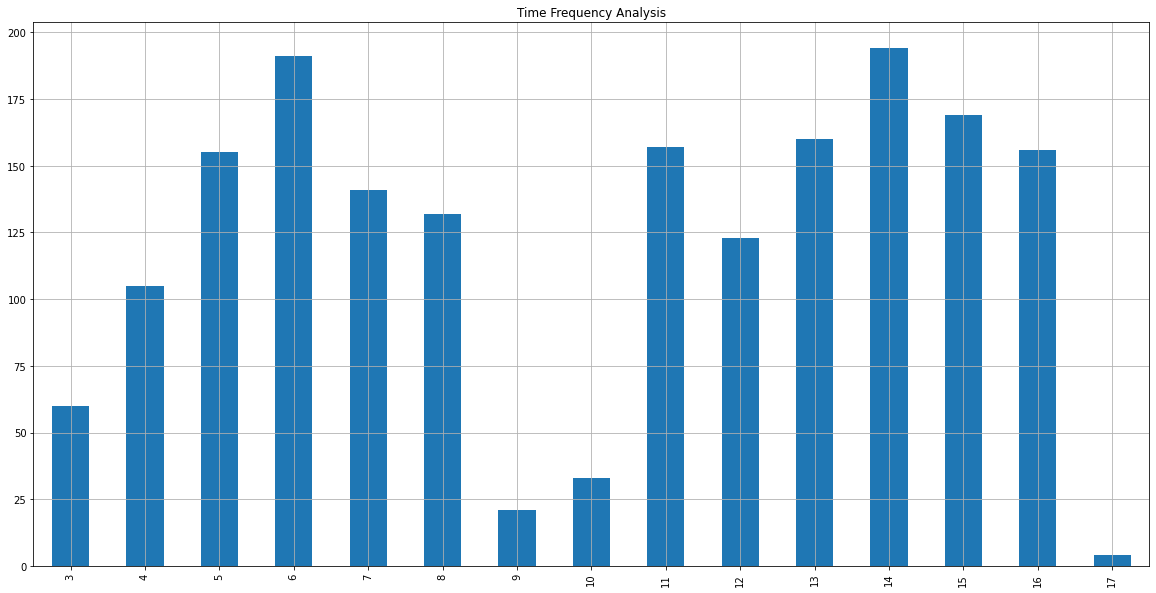

In [6]:
# overview time analysis
data["date"].value_counts().sort_index().plot(kind = "bar", figsize = (20, 10)).set_title("Time Frequency Analysis")
plt.grid(True);

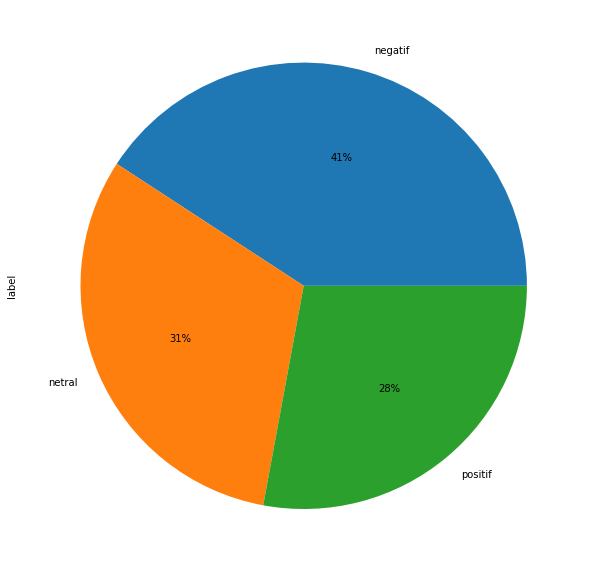

In [7]:
# overview sentiment
data["label"].value_counts().plot(kind = "pie", autopct = "%2.f%%", figsize = (10, 15));

In [8]:
def generate_wordcloud(data, title):
    comment_words = ''
    for comment in data["text"]:
        # apply tokenize and lowercase
        comment_words += " ".join([i.lower() for i in comment.split()]) + " "
        
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = list_stopwords,
                min_font_size = 10).generate(comment_words)
 
    # plot the wordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [9]:
data["label"].unique()

array(['positif', 'netral', nan, 'negatif'], dtype=object)

In [10]:
# separate data based on their label
pos = data[data["label"] == "positif"]
neu = data[data["label"] == "netral"]
neg = data[data["label"] == "negatif"]

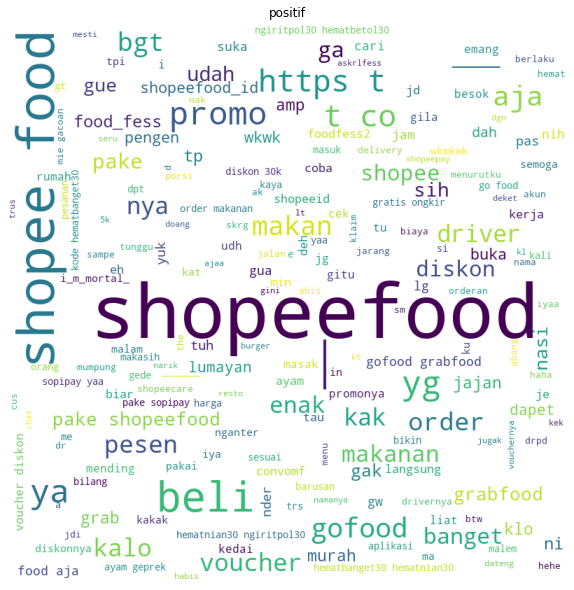

In [11]:
generate_wordcloud(pos, "positif")

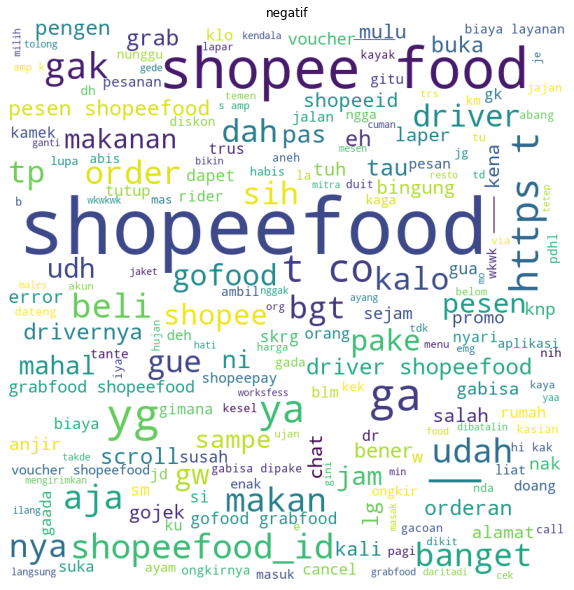

In [12]:
generate_wordcloud(neg, "negatif")

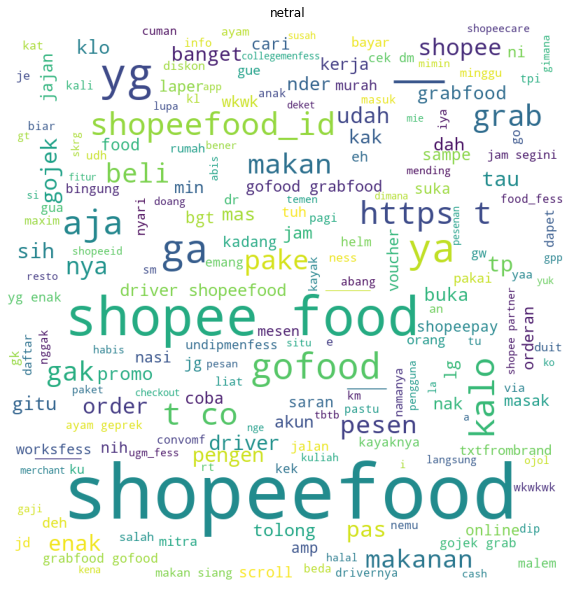

In [13]:
generate_wordcloud(neu, "netral")

# 2. Text Preprocessing

In [14]:
# !pip install sastrawi

In [15]:
# load libraries
import re
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [16]:
stemmer  = StemmerFactory().create_stemmer()
stopword = set(stopwords.words('indonesian'))

In [17]:
# define cleaning function
def cleansing(text):
    # senang emoticon
    emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', ':d', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
    # sedih emoticon
    emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
    # menghapus emoticon
    emoticons = emoticons_happy.union(emoticons_sad)
    text = ' '.join([word for word in text.split() if word not in emoticons])
    # hapus mentions
    text = re.sub('@[^\s]+','',text)
    # hapus hashtags
    text = re.sub("#[A-Za-z0-9_]+","", text)
    # hapus url / links
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    # hapus tanda baca
    text = re.sub('[^a-zA-Z0-9\s]', '', text)
    # hapus multiple spaces
    text = re.sub('\s+', ' ', text)
    # hapus retweets
    text = re.sub(r'RT', '', text)
    # hapus angka
    text = re.sub(r'[0-9]+', ' ', text)
    # hapus huruf terkait shopee dan kecilkan huruf
    text = " ".join([i.lower() for i in text.split() if i.lower().strip() not in ["shopee", "shopeefood", "shopeefod_id", "food"]])

    return text

def casefolding(text):
    # mengubah karakter menjadi huruf kecil
    text = text.lower()
    return text

def tokenizing(text):
    text = text.split()
    return text

def remove_stopword(text):
    stp = stopwords.words('indonesian')
    text = ' '.join([word for word in text if word not in stp])
    return text

def stem_text(texts):
    result = []
    for text in tqdm(texts):
        result.append(' '.join([stemmer.stem(word) for word in text.split()]))
    return result

def single_stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [18]:
# select feature of dataset
df = data[['text', 'label']]

df.head()

,text,label
0,@sahabatgiselle Pesen shopeefood yang makanan ...,positif
1,@holyzaa @FOODFESS2 pake shopeefood aja 24k bi...,positif
2,Indo\n\nPesawat siapin budget : 1 - 1.5jt pp\n...,netral
3,yaampun dapet driver shopee food baik bangettt...,positif
4,@ShopeePay_ID Mana miiinn???? Aku mau jajan di...,netral


In [19]:
# apply text cleaning

# proses cleansing
df['cleansing'] = df['text'].apply(lambda x: cleansing(x))
print("Cleaning Done...")

# proses casefolding
df['casefolding'] = df['cleansing'].apply(lambda x: casefolding(x))
print("Casefolding Done...")

# proses tokenizing
df['tokenizing'] = df['casefolding'].apply(lambda x: tokenizing(x))
print("Tokenizing Done...")

# proses hapus stopword
df['stopword'] = df['tokenizing'].apply(lambda x: remove_stopword(x))
print("Stopwords Done...")

df.head()

Cleaning Done...
Casefolding Done...
Tokenizing Done...
Stopwords Done...


,text,label,cleansing,casefolding,tokenizing,stopword
0,@sahabatgiselle Pesen shopeefood yang makanan ...,positif,pesen yang makanan jam gt kalau gaakkkk,pesen yang makanan jam gt kalau gaakkkk,"[pesen, yang, makanan, jam, gt, kalau, gaakkkk]",pesen makanan jam gt gaakkkk
1,@holyzaa @FOODFESS2 pake shopeefood aja 24k bi...,positif,pake aja k bisa double lauk utama lauk tambaha...,pake aja k bisa double lauk utama lauk tambaha...,"[pake, aja, k, bisa, double, lauk, utama, lauk...",pake aja k double lauk utama lauk tambahan
2,Indo\n\nPesawat siapin budget : 1 - 1.5jt pp\n...,netral,indo pesawat siapin budget jt pp kereta k pp t...,indo pesawat siapin budget jt pp kereta k pp t...,"[indo, pesawat, siapin, budget, jt, pp, kereta...",indo pesawat siapin budget jt pp kereta k pp t...
3,yaampun dapet driver shopee food baik bangettt...,positif,yaampun dapet driver baik bangettt huhuhu seha...,yaampun dapet driver baik bangettt huhuhu seha...,"[yaampun, dapet, driver, baik, bangettt, huhuh...",yaampun dapet driver bangettt huhuhu sehat bap...
4,@ShopeePay_ID Mana miiinn???? Aku mau jajan di...,netral,mana miiinn aku mau jajan di nii huhu,mana miiinn aku mau jajan di nii huhu,"[mana, miiinn, aku, mau, jajan, di, nii, huhu]",miiinn jajan nii huhu


In [20]:
# save dataset
df.to_csv("dataset_full.csv", index = False)

In [21]:
# proses stemming
df['stem'] = stem_text(df['stopword'].tolist())
print("Stem Done...")

100%|██████████████████████████████████████████████████████████████████████████████| 1801/1801 [03:54<00:00,  7.68it/s]

Stem Done...


In [22]:
# overview result after text cleaning
df.head()

,text,label,cleansing,casefolding,tokenizing,stopword,stem
0,@sahabatgiselle Pesen shopeefood yang makanan ...,positif,pesen yang makanan jam gt kalau gaakkkk,pesen yang makanan jam gt kalau gaakkkk,"[pesen, yang, makanan, jam, gt, kalau, gaakkkk]",pesen makanan jam gt gaakkkk,sen makan jam gt gaakkkk
1,@holyzaa @FOODFESS2 pake shopeefood aja 24k bi...,positif,pake aja k bisa double lauk utama lauk tambaha...,pake aja k bisa double lauk utama lauk tambaha...,"[pake, aja, k, bisa, double, lauk, utama, lauk...",pake aja k double lauk utama lauk tambahan,pake aja k double lauk utama lauk tambah
2,Indo\n\nPesawat siapin budget : 1 - 1.5jt pp\n...,netral,indo pesawat siapin budget jt pp kereta k pp t...,indo pesawat siapin budget jt pp kereta k pp t...,"[indo, pesawat, siapin, budget, jt, pp, kereta...",indo pesawat siapin budget jt pp kereta k pp t...,indo pesawat siapin budget jt pp kereta k pp t...
3,yaampun dapet driver shopee food baik bangettt...,positif,yaampun dapet driver baik bangettt huhuhu seha...,yaampun dapet driver baik bangettt huhuhu seha...,"[yaampun, dapet, driver, baik, bangettt, huhuh...",yaampun dapet driver bangettt huhuhu sehat bap...,yaampun dapet driver bangettt huhuhu sehat bap...
4,@ShopeePay_ID Mana miiinn???? Aku mau jajan di...,netral,mana miiinn aku mau jajan di nii huhu,mana miiinn aku mau jajan di nii huhu,"[mana, miiinn, aku, mau, jajan, di, nii, huhu]",miiinn jajan nii huhu,miiinn jajan nii huhu


In [23]:
# filter data
dataset = df[['stem', 'label']]
dataset = dataset.dropna().reset_index().drop("index", axis = 1)
dataset.head()

,stem,label
0,sen makan jam gt gaakkkk,positif
1,pake aja k double lauk utama lauk tambah,positif
2,indo pesawat siapin budget jt pp kereta k pp t...,netral
3,yaampun dapet driver bangettt huhuhu sehat bap...,positif
4,miiinn jajan nii huhu,netral


In [24]:
# save dataset
dataset.to_csv("dataset_filter.csv", index = False)

# 3. Data Preprocessing

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
def train_test_split(X, y, test_size):
    arr_rand = np.random.rand(X.shape[0])
    size     = test_size * 10
    split    = arr_rand < np.percentile(arr_rand, test_size)
    
    X_train = X[~split]
    y_train = y[~split]
    X_test  = X[~split]
    y_test  = y[~split]
    
    return X_train, y_train, X_test, y_test

In [27]:
# convert text to numerical
label = LabelEncoder()
Y     = label.fit_transform(dataset["label"].values.reshape(-1, 1))

In [28]:
# weighting text using TF-IDF
vectorizer = TfidfVectorizer()
X          = vectorizer.fit_transform(dataset["stem"].values).toarray()

In [29]:
# overview dimension
print(X.shape, Y.shape)

(1799, 4165) (1799,)


# 4. Data Modeling

In [43]:
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  plot_confusion_matrix, classification_report, confusion_matrix

## 4.1. Multiclass Classification

In [44]:
# split dataset
X_train, y_train, X_test, y_test = train_test_split(X, Y, test_size = 0.2)

In [45]:
model = GaussianNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))
# accuracy score
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       732
           1       0.88      1.00      0.94       501

    accuracy                           0.94      1233
   macro avg       0.94      0.95      0.94      1233
weighted avg       0.95      0.94      0.94      1233

accuracy score = 94.40%


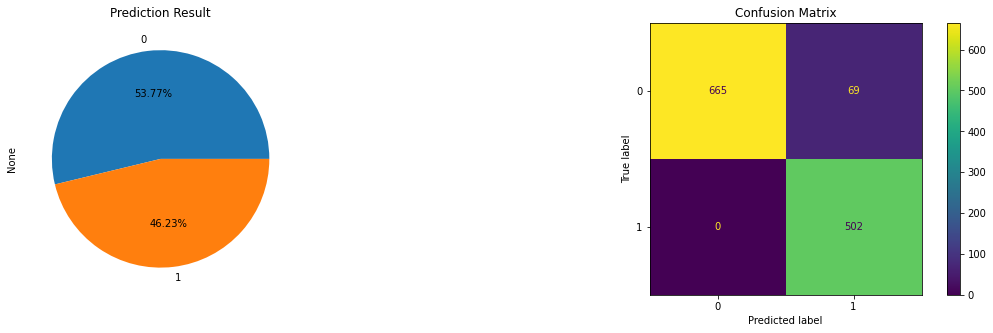

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [47]:
model = MultinomialNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))
# accuracy score
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       732
           1       1.00      0.77      0.87       501

    accuracy                           0.90      1233
   macro avg       0.93      0.88      0.90      1233
weighted avg       0.92      0.90      0.90      1233

accuracy score = 90.43%


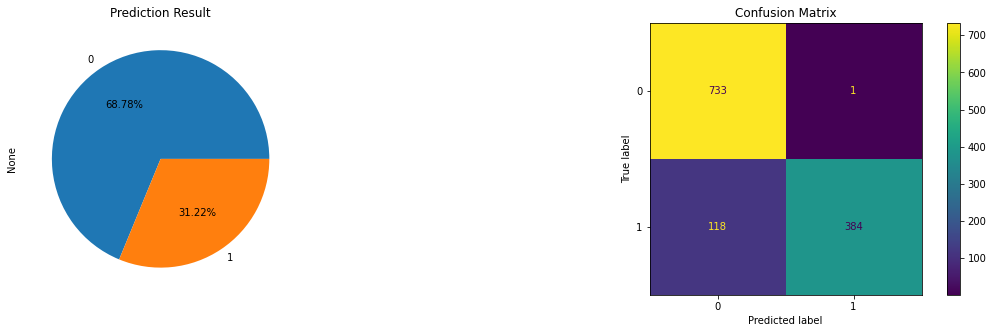

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [36]:
model = BernoulliNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))
# accuracy score
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       734
           1       0.87      0.81      0.84       559
           2       0.97      0.69      0.81       502

    accuracy                           0.84      1795
   macro avg       0.87      0.82      0.84      1795
weighted avg       0.86      0.84      0.84      1795

accuracy score = 84.40%


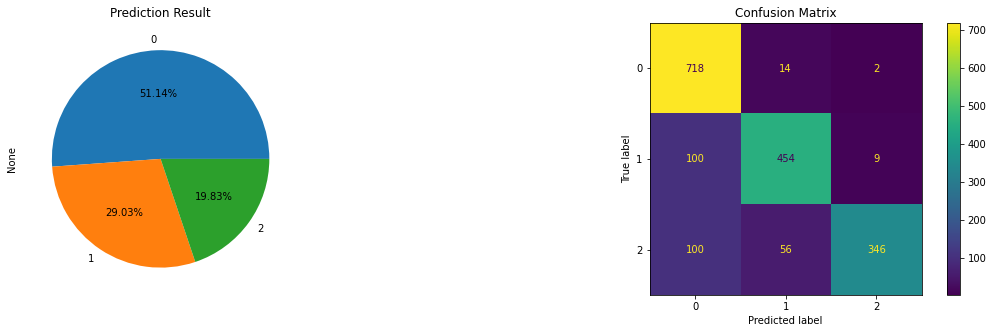

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [38]:
model = SVR().fit(X_train, y_train)
prediction = model.predict(X_test).astype(int)
print(classification_report(y_test, prediction))
# accuracy score
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       734
           1       0.28      0.34      0.31       559
           2       1.00      0.01      0.02       502

    accuracy                           0.52      1795
   macro avg       0.65      0.45      0.37      1795
weighted avg       0.64      0.52      0.43      1795

accuracy score = 51.64%


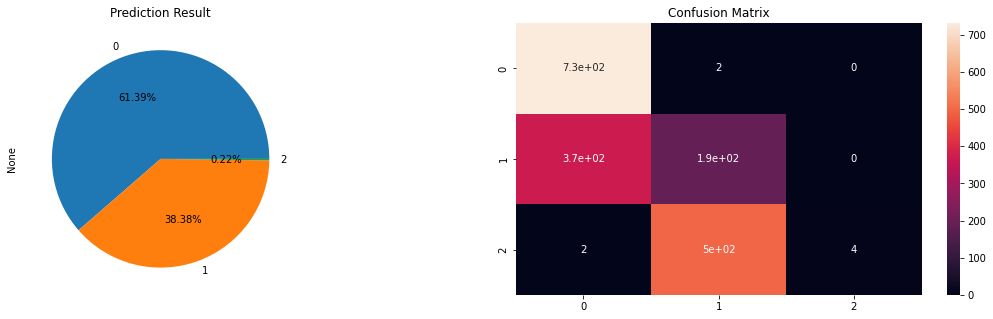

In [39]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction), index = list(range(3)), columns = list(range(3))), annot = True, ax = ax[1])
ax[1].set_title("Confusion Matrix");

## 4.2. Binary Classification

In [52]:
binary_dataset = dataset[dataset["label"] != "netral"]

id_to_label = {
    '0' : "Negatif",
    "1" : "Positif"
}
binary_dataset.head()

,stem,label
0,sen makan jam gt gaakkkk,positif
1,pake aja k double lauk utama lauk tambah,positif
3,yaampun dapet driver bangettt huhuhu sehat bap...,positif
5,bang modal pacar,positif
6,madyang gedhen pasti,positif


In [32]:
# convert text to numerical
label = LabelEncoder()
Y     = label.fit_transform(binary_dataset["label"].values.reshape(-1, 1))

In [33]:
# weighting text using TF-IDF
vectorizer = TfidfVectorizer()
X          = vectorizer.fit_transform(binary_dataset["stem"].values).toarray()

In [34]:
# overview dimension
print(X.shape, Y.shape)

(1236, 3300) (1236,)


In [35]:
# split dataset
X_train, y_train, X_test, y_test = train_test_split(X, Y, test_size = 0.2)

In [36]:
model = GaussianNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       733
           1       0.88      1.00      0.94       500

    accuracy                           0.94      1233
   macro avg       0.94      0.95      0.94      1233
weighted avg       0.95      0.94      0.94      1233



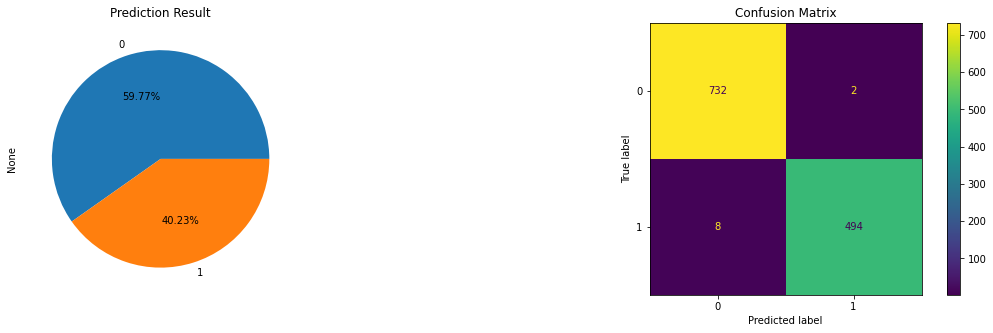

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [64]:
t0 = time.time()
model = MultinomialNB().fit(X_train, y_train)
t1 = time.time()
prediction = model.predict(X_test)
t2 = time.time()
time_linear_train_NB = t1-t0
time_linear_predict_NB = t2-t1
print("Training time: %fs; Prediction time: %fs" % (time_linear_train_NB, time_linear_predict_NB))
print(classification_report(y_test, prediction))
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')
print('Precision = '+str('{:4.2f}'.format(precision_score(y_test, prediction)*100))+'%')
print('Recall: ' +str('{:4.2f}'.format(recall_score(y_test, prediction)*100))+'%')
print('F1-Score: ' +str('{:4.2f}'.format(f1_score(y_test, prediction)*100))+'%')
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print(tn, fp, fn, tp)

Training time: 0.011940s; Prediction time: 0.008975s
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       732
           1       1.00      0.77      0.87       501

    accuracy                           0.90      1233
   macro avg       0.93      0.88      0.90      1233
weighted avg       0.92      0.90      0.90      1233

accuracy score = 90.43%
Precision = 99.74%
Recall: 76.65%
F1-Score: 86.68%
731 1 117 384


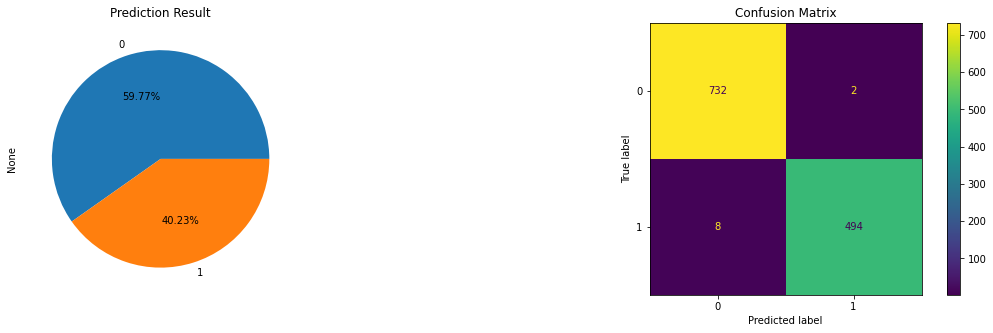

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [132]:
model = BernoulliNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       733
           1       0.98      0.83      0.90       500

    accuracy                           0.92      1233
   macro avg       0.94      0.91      0.92      1233
weighted avg       0.93      0.92      0.92      1233



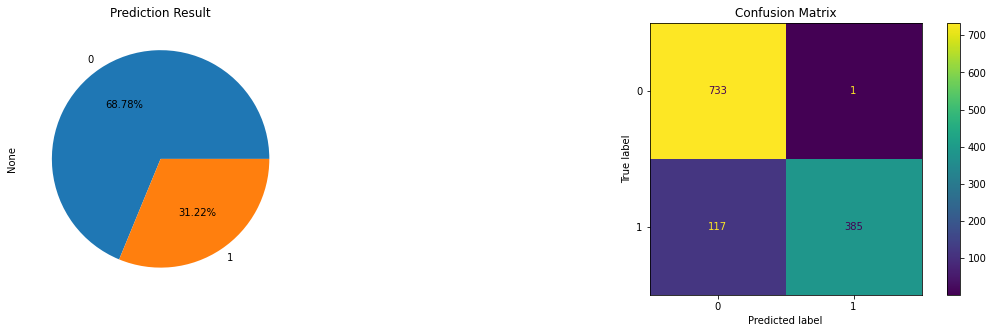

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
plot_confusion_matrix(model, X, Y, ax = ax[1])
ax[1].set_title("Confusion Matrix");

In [65]:
t0 = time.time()
model = SVC().fit(X_train, y_train)
t1 = time.time()
prediction = model.predict(X_test).astype(int)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
print(classification_report(y_test, prediction))
print('accuracy score = '+str('{:4.2f}'.format(accuracy_score(y_test, prediction)*100))+'%')
print('Precision = '+str('{:4.2f}'.format(precision_score(y_test, prediction)*100))+'%')
print('Recall: ' +str('{:4.2f}'.format(recall_score(y_test, prediction)*100))+'%')
print('F1-Score: ' +str('{:4.2f}'.format(f1_score(y_test, prediction)*100))+'%')
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print(tn, fp, fn, tp)  # 1 1 1 1

Training time: 2.224051s; Prediction time: 3.003963s
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       1.00      0.99      0.99       501

    accuracy                           0.99      1233
   macro avg       0.99      0.99      0.99      1233
weighted avg       0.99      0.99      0.99      1233

accuracy score = 99.27%
Precision = 99.60%
Recall: 98.60%
F1-Score: 99.10%
730 2 7 494


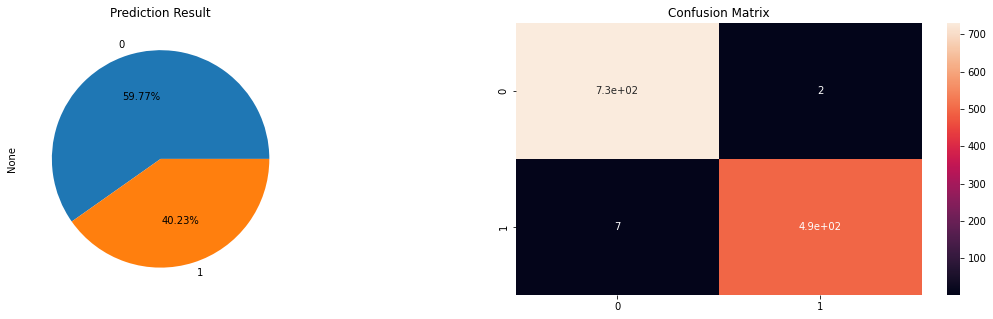

In [83]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(prediction).value_counts().plot(kind = "pie", autopct = "%.2f%%", ax = ax[0]).set_title("Prediction Result")
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, prediction), index = list(range(2)), columns = list(range(2))), annot = True, ax = ax[1])
ax[1].set_title("Confusion Matrix");

# 5. Text Testing

In [79]:
tweet   = cleansing('rusak aplikasinya susah bener dipakai')
print(tweet)
tweet   = casefolding(tweet)
print(tweet)
tweet   = tokenizing(tweet)
print(tweet)
tweet   = remove_stopword(tweet)
print(tweet)
tweet   = single_stem_text(tweet)
print(tweet)
v_data  = vectorizer.transform([tweet]).toarray()
print(v_data)

rusak aplikasinya susah bener dipakai
rusak aplikasinya susah bener dipakai
['rusak', 'aplikasinya', 'susah', 'bener', 'dipakai']
rusak aplikasinya susah bener dipakai
rusak aplikasi susah bener pakai
[[0. 0. 0. ... 0. 0. 0.]]


In [80]:
model.predict(v_data)[0]

0

In [92]:
# 0 : negatif
# 1 : netral - in multiclass
# 2 : positif